In [5]:
!pip install --upgrade 'git+https://github.com/paulgavrikov/visualkeras'
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import tensorflow.keras.optimizers
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import os
from tensorflow.keras.regularizers import l2
import visualkeras
from PIL import ImageFont

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, imsave
import cv2
import numpy as np
import tensorflow
from sklearn.metrics import plot_confusion_matrix# This Python 3 environment comes with many helpful analytics libraries installed

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-848573rv
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-848573rv
  Resolved https://github.com/paulgavrikov/visualkeras to commit d7111d3471173c0b16853a6ce5e4cc645498380a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 2.4 MB/s eta 0:00:0000:0100:01
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13449 sha256=3eb3abb26992c9c196c217f26759e54fc3bfe69b3d62e113115681b65e2028de
  Stored in directory: /tmp/pip-ephem-wheel-cache-08n_pnac/wheels/b8/3b/cf/30a062e766188d5fe50abf3d461720943b7d09906e3d261a94
Successfully built visualkeras


In [2]:
def load(file_path):
    image = imread(file_path)
    return image
def display(image,title="Image"):
    plt.figure(figsize=[10,10])
    channels=len(image.shape)
    if channels<3:
        plt.imshow(image,cmap='Greys_r');
    else:
        plt.imshow(image);      
    plt.title(title);plt.axis("off"); 
    
def check_label(file_path):
    if os.path.getsize(file_path) == 0:
        return 0
    else :
        return 1
def load_data(directory):
    my_counter_0=0
    my_counter_1=0
    sequence=["x/train","x/test","x/valid"]
    train_data=[]
    test_data=[]
    valid_data=[]
    
    valid_labels=[]
    test_labels=[]    
    train_labels=[]
    for x in sequence:
        directory_search=directory+x[1:]+'/images'
        for filename in os.listdir(directory_search):
            f = os.path.join(directory_search, filename)
            if os.path.isfile(f):
                my_image=load(f)
                if len(my_image.shape)==1:
                    my_image = cv2.cvtColor(my_image, cv2.COLOR_GRAY2RGB) 
                
                resized = cv2.resize(my_image,(640,640), interpolation = cv2.INTER_AREA)
                if x == 'x/train' :
                    train_data.append(resized)
                elif x == 'x/test' :
                    test_data.append(resized)
                else:
                    valid_data.append(resized)
    
        directory_search=directory+x[1:]+'/labels'
        for filename in os.listdir(directory_search):
            f = os.path.join(directory_search, filename)
            if os.path.isfile(f):
                label=check_label(f)
                if label==0:
                    my_counter_0+=1
                elif label==1:
                    my_counter_1+=1
                if x == 'x/train' :
                    train_labels.append(label)
                elif x == 'x/test' :
                    test_labels.append(label)
                else:
                    valid_labels.append(label)
    print("Defected Pictures : ",my_counter_1)
    print("Non-Defected Pictures : ",my_counter_0)

    return train_data,test_data,valid_data,train_labels,test_labels,valid_labels

In [ ]:
train_data,test_data,valid_data,train_labels,test_labels,valid_labels=load_data("/kaggle/input/finaldataset-autoinspect/")
np_train_data=np.array(train_data)
np_train_data = np_train_data.reshape((np_train_data.shape[0], 640,640, 3))
np_train_data = np_train_data.astype("float32") / 255.0
np_train_labels = np.asarray(train_labels).astype('float32').reshape((-1,1))

np_test_data=np.array(test_data)
np_test_data = np_test_data.reshape((np_test_data.shape[0], 640,640, 3))
np_test_data = np_test_data.astype("float32") / 255.0
np_test_labels = np.asarray(test_labels).astype('float32').reshape((-1,1))

np_valid_data=np.array(valid_data)
np_valid_data = np_valid_data.reshape((np_valid_data.shape[0], 640,640, 3))
np_valid_data = np_valid_data.astype("float32") / 255.0
np_valid_labels = np.asarray(valid_labels).astype('float32').reshape((-1,1))

In [10]:
class Defect_Net:    

    def build(imgRows, imgCols,numChannels,numClasses):
        # initialize the model
        model = Sequential()
        inputShape = (imgRows, imgCols, numChannels)
        
        model.add(Conv2D(32, 11, padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        
        model.add(Conv2D(32, 7, padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(keras.layers.AveragePooling2D(pool_size=(2, 2))) 
        model.add(BatchNormalization())
        
        model.add(Conv2D(64, 7, padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        
        model.add(Conv2D(64, 5, padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(keras.layers.AveragePooling2D(pool_size=(2, 2))) 
        model.add(BatchNormalization())

        model.add(Conv2D(128, 5, padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        
        model.add(Conv2D(128, 3, padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(keras.layers.AveragePooling2D(pool_size=(2, 2))) 
        model.add(BatchNormalization())

        model.add(Conv2D(64, 3, padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(keras.layers.AveragePooling2D(pool_size=(2, 2))) 
        
        model.add(Conv2D(32, 3, padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(keras.layers.AveragePooling2D(pool_size=(2, 2))) 
        
        model.add(Flatten())
        model.add(Activation("relu"))

        model.add(Dense(256))
        model.add(Activation("relu"))
        
        model.add(Dense(numClasses-1))
        model.add(Activation("sigmoid"))
        return model

2023-01-08 22:45:47.429850: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 640, 640, 32)      11648     
_________________________________________________________________
activation (Activation)      (None, 640, 640, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 640, 640, 32)      50208     
_________________________________________________________________
activation_1 (Activation)    (None, 640, 640, 32)      0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 320, 320, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 320, 320, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 320, 320, 64)      1

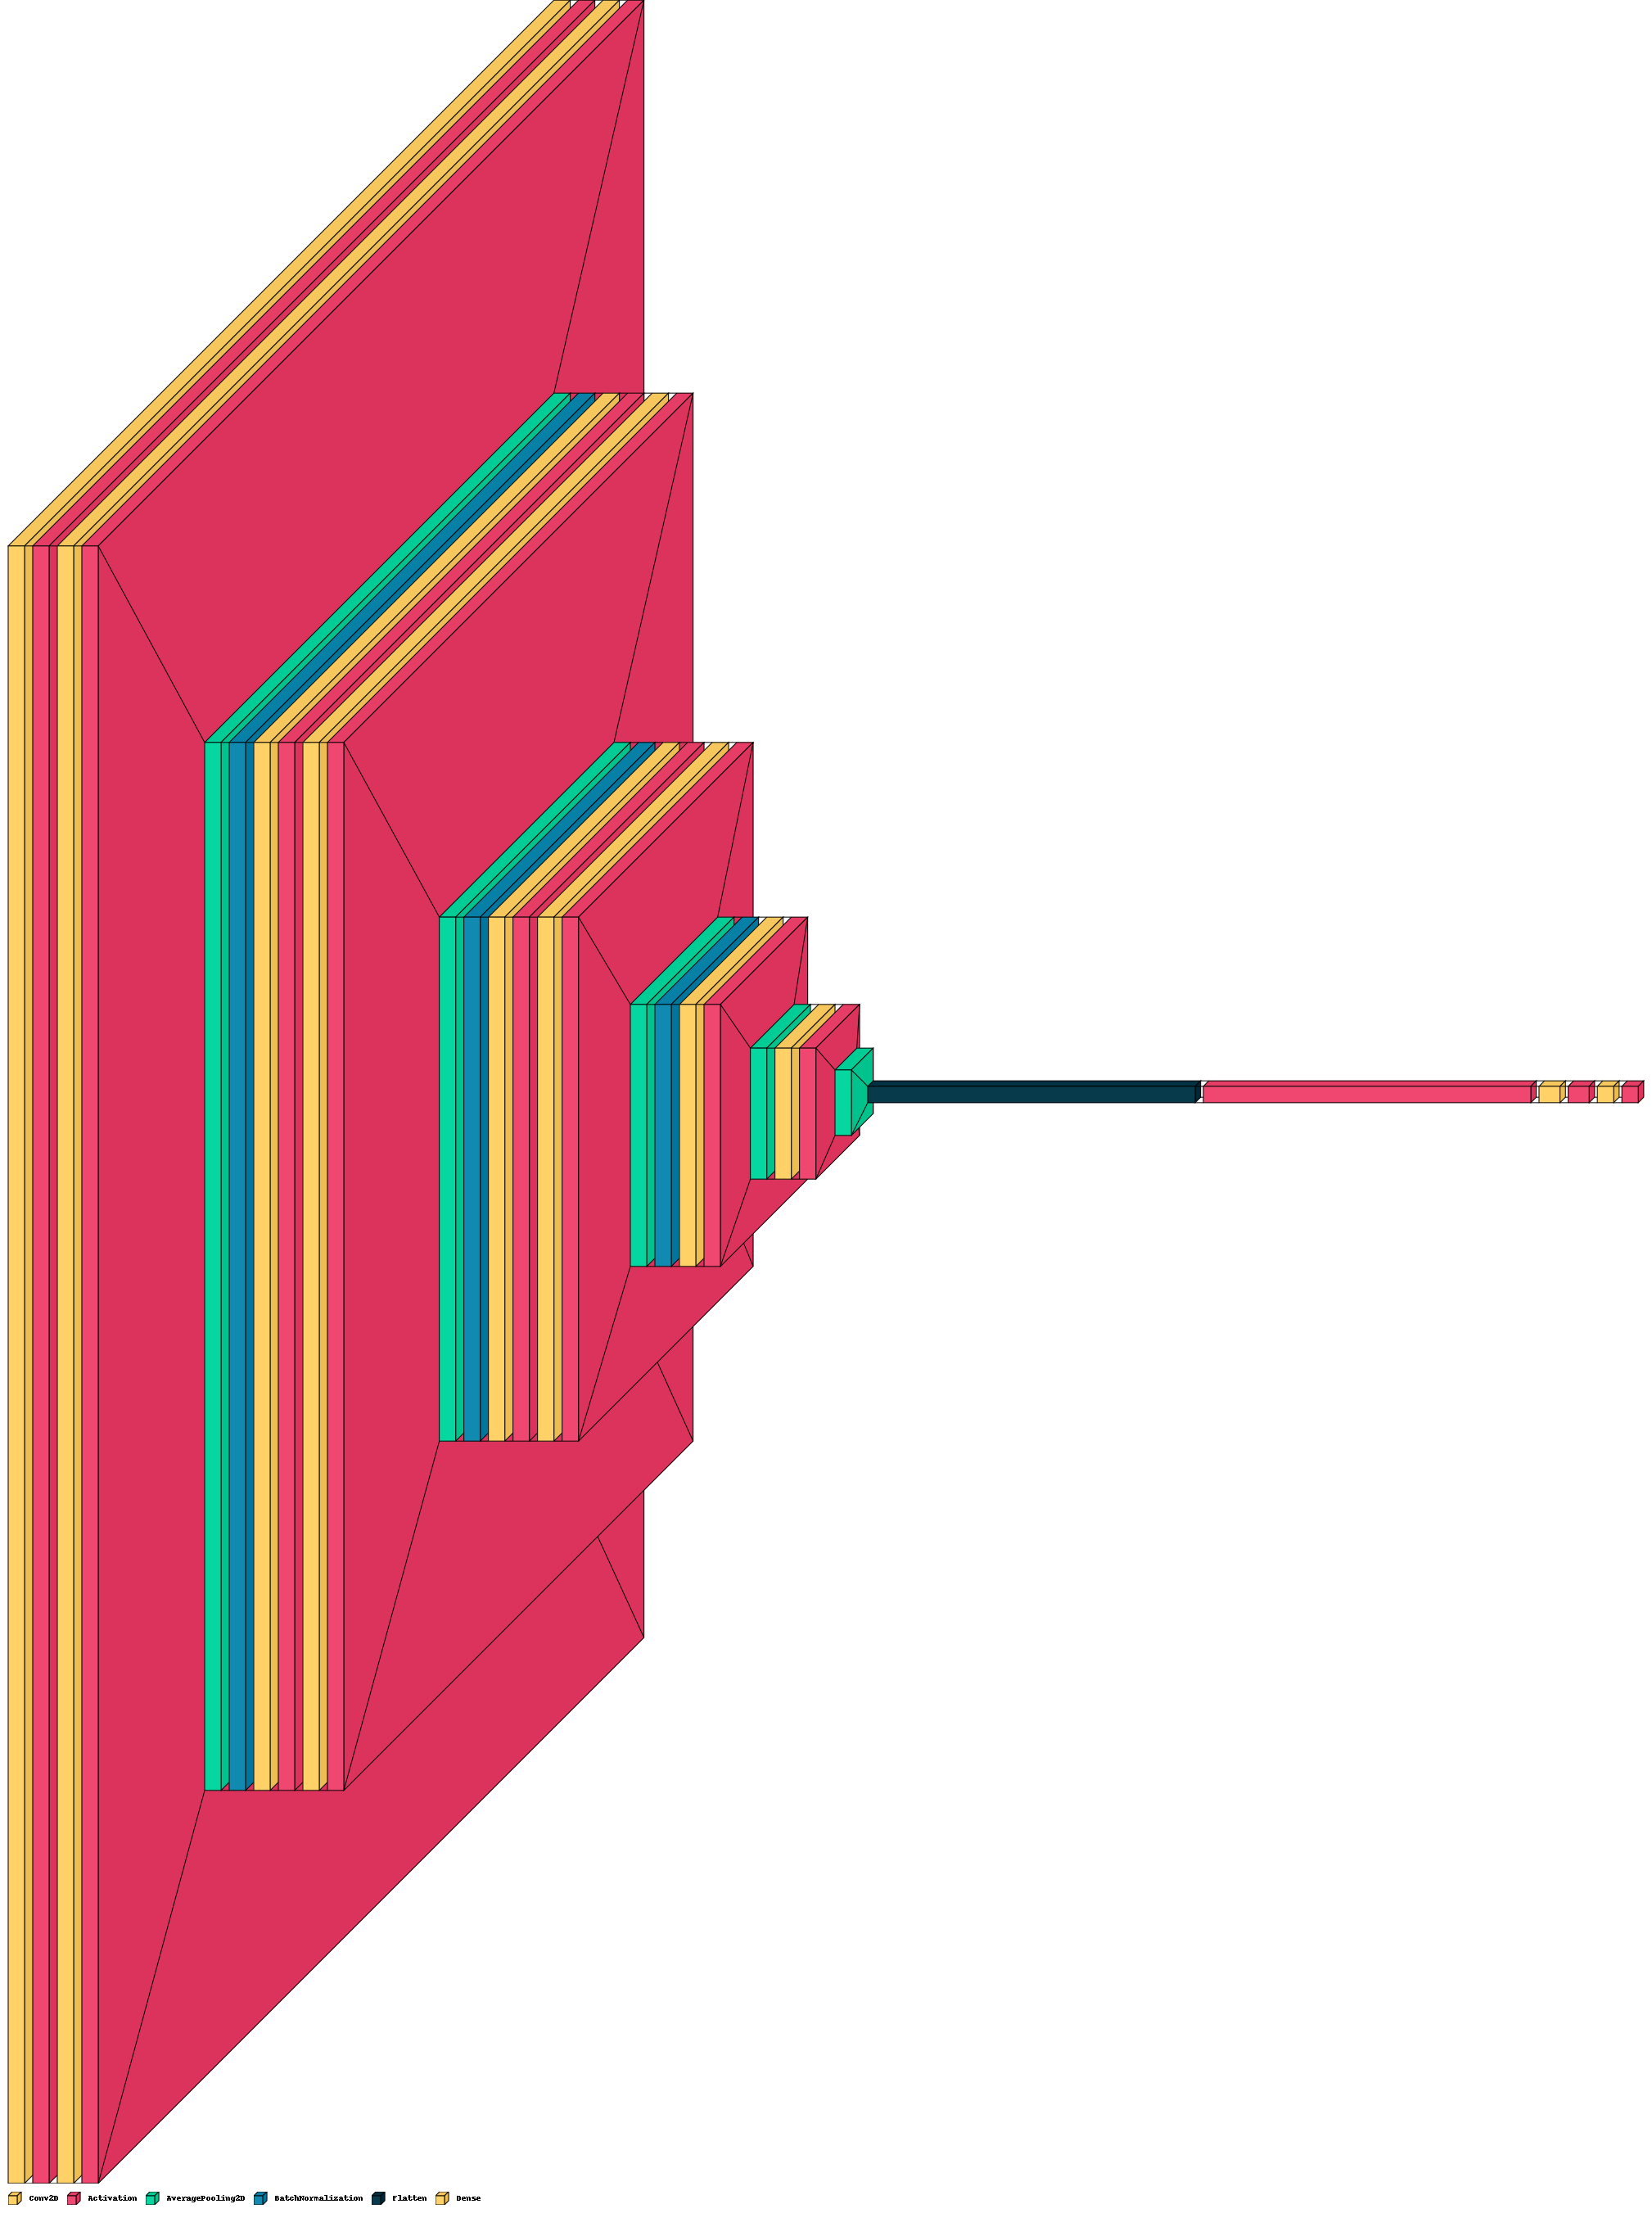

In [11]:
model = Defect_Net.build(numChannels=3, imgRows=640, imgCols=640,numClasses=2)
model.summary()
# font = ImageFont.truetype("arial.ttf", 32)  
visualkeras.layered_view(model, legend=True)  # font is optional!

In [ ]:
model = Defect_Net.build(numChannels=3, imgRows=640, imgCols=640,numClasses=2)
opt = keras.optimizers.Adam(learning_rate=0.02)
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
model.fit(np_train_data, np_train_labels, batch_size=32, epochs=20,verbose=1,validation_data=(np_valid_data, np_valid_labels))

In [ ]:
scores = model.evaluate(np_test_data, np_test_labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
model.save('Defect-Net')